<a href="https://colab.research.google.com/github/laelynette/CPE-313/blob/main/Hands_on_Activity_1_2_Training_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.2 : Training Neural Networks


**Maria Antonette O. Castillo**

**CPE32S8**

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath = "/content/drive/MyDrive/DATA/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
378,4,156,75,0,0,48.3,0.238,32,1
197,3,107,62,13,48,22.9,0.678,23,1
26,7,147,76,0,0,39.4,0.257,43,1
83,0,101,65,28,0,24.6,0.237,22,0
666,4,145,82,18,0,32.5,0.235,70,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200,verbose=0)


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

#y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_class_nn_1 =(model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.47645965],
       [0.76707834],
       [0.33064735],
       [0.18178777],
       [0.22750153],
       [0.4701797 ],
       [0.02777125],
       [0.35174885],
       [0.9186713 ],
       [0.13973606]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve',
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.786
roc-auc is 0.822


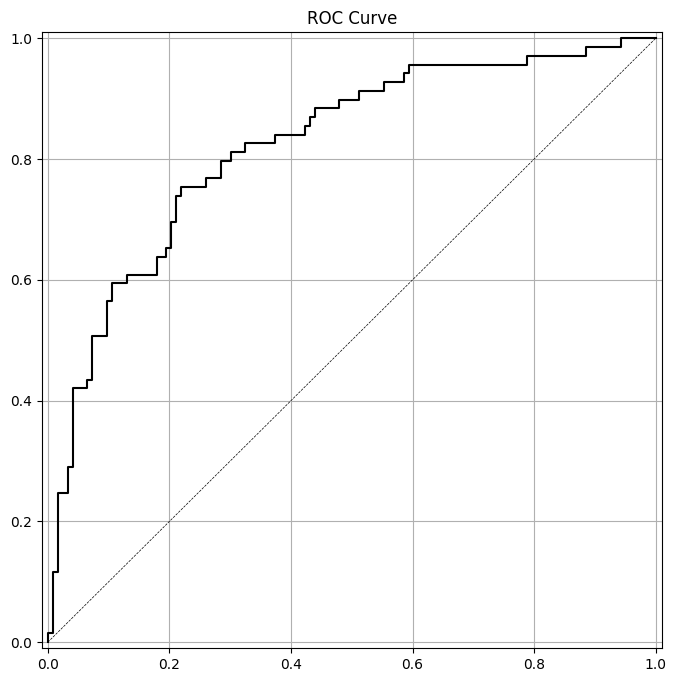

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1)

### ***The 78% accuracy score indicates that the model is not performing well at making predictions. Moreover, the roc_auc score of 82% means that the model is having difficulties in differentiating between 2 classes: (has diabetes and no diabetes).***

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

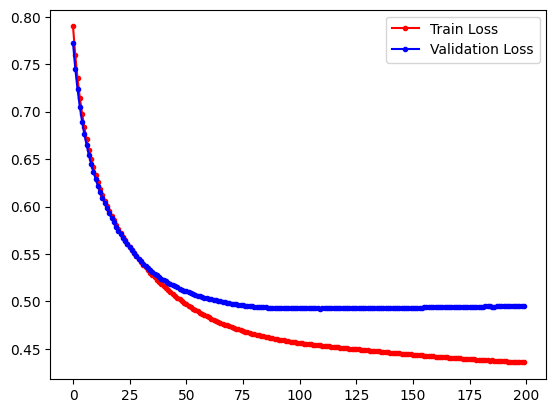

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

### ***As more epochs performed in the model, the training loss and validation loss decreases. This means that the model is continuosly learning from the data. However, after reaching around 100 epochs, the decreasing rate becomes slower especially in validation loss. This indicates that the model may reach a plateau if we further increase the number of epochs.***

####**Supplementary Activity**

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epochs and network structures
* Interpret your result

In [ ]:
# Differentiated Thyroid Cancer Recurrence Dataset

data = pd.read_csv('/content/drive/MyDrive/DATA/Thyroid_Diff.csv')

In [ ]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
data["Recurred"].value_counts()

No     275
Yes    108
Name: Recurred, dtype: int64

In [ ]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
# Using label encoder to transform categorical data into numerical data type.

from sklearn.preprocessing import LabelEncoder

data = data[1:].apply(LabelEncoder().fit_transform)

In [ ]:
# X for independent variables and y for dependent variable

X = data.iloc[:, :-1].values
y = data["Recurred"].values

In [ ]:
# Splitting the dataset, 75% for training and 25% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
# Scaling the data

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [ ]:
# Building a model with two hidden layers, each with 6 nodes
# Using the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

model_supp = Sequential([
    Dense(6, input_shape=(16,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Using a learning rate of .003 and train the model for 1500 epochs

model_supp.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1_supp = model_supp.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500,verbose=0)

In [ ]:
# Make predictions on the test data

y_pred_class_nn_1_supp =(model_supp.predict(X_test) > 0.5).astype("int32")
y_pred_prob_nn_1_supp = model_supp.predict(X_test)

3/3 [==============================] - 0s 3ms/step


accuracy is 0.863
roc-auc is 0.941


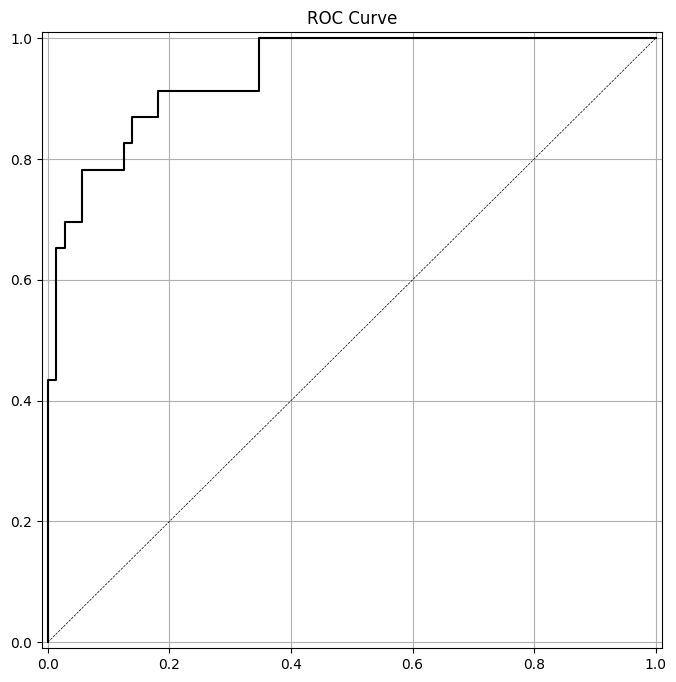

In [ ]:
# Determining the accuracy and roc_auc score

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1_supp)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1_supp)))

# ROC curve
plot_roc(y_test, y_pred_prob_nn_1_supp)

### ***After creating a model with two hidden layer, applying relu and sigmoid activation function, then train it for 1500 epochs, the accuracy leads to a score of approximately 86% and roc_auc score of approximately 94%. This means that the model is good at predicting and differentiating between the two classes. However, this results could still be improve by experimenting the hyperparameters that will be shown in the code below.***

In [ ]:
# Recorded metrics during training

run_hist_1_supp.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

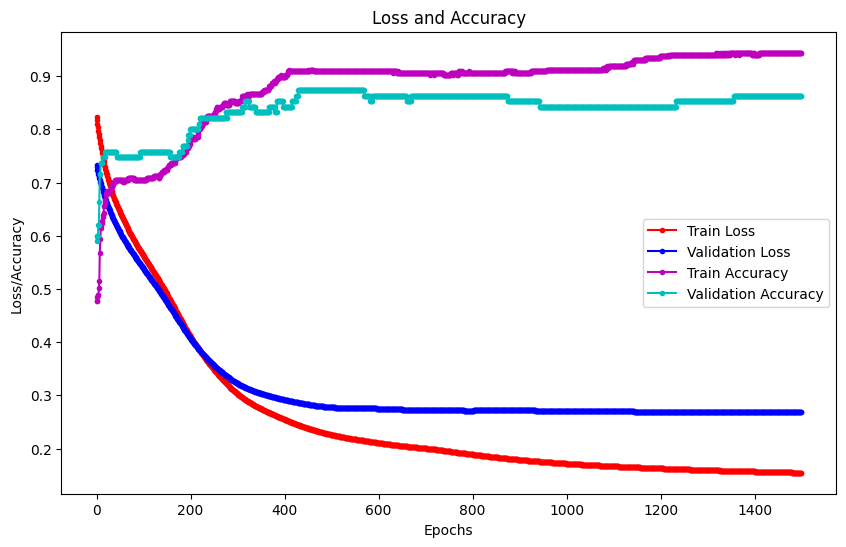

In [ ]:
# Plotting loss and accuracy

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))
ax1.plot(run_hist_1_supp.history["loss"], 'r', marker='.', label="Train Loss")
ax1.plot(run_hist_1_supp.history["val_loss"], 'b', marker='.', label="Validation Loss")
ax1.plot(run_hist_1_supp.history["accuracy"], 'm', marker='.', label="Train Accuracy")
ax1.plot(run_hist_1_supp.history["val_accuracy"], 'c', marker='.', label="Validation Accuracy")
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss/Accuracy')
ax1.set_title('Loss and Accuracy')
plt.show()

### ***The graph above indicates that the model is fortunately not overfitting as the difference between the result of training and validation set is minimal. Additionally, upon observation, as the number of epochs reaches around 600, the validation loss shows little improvement.***

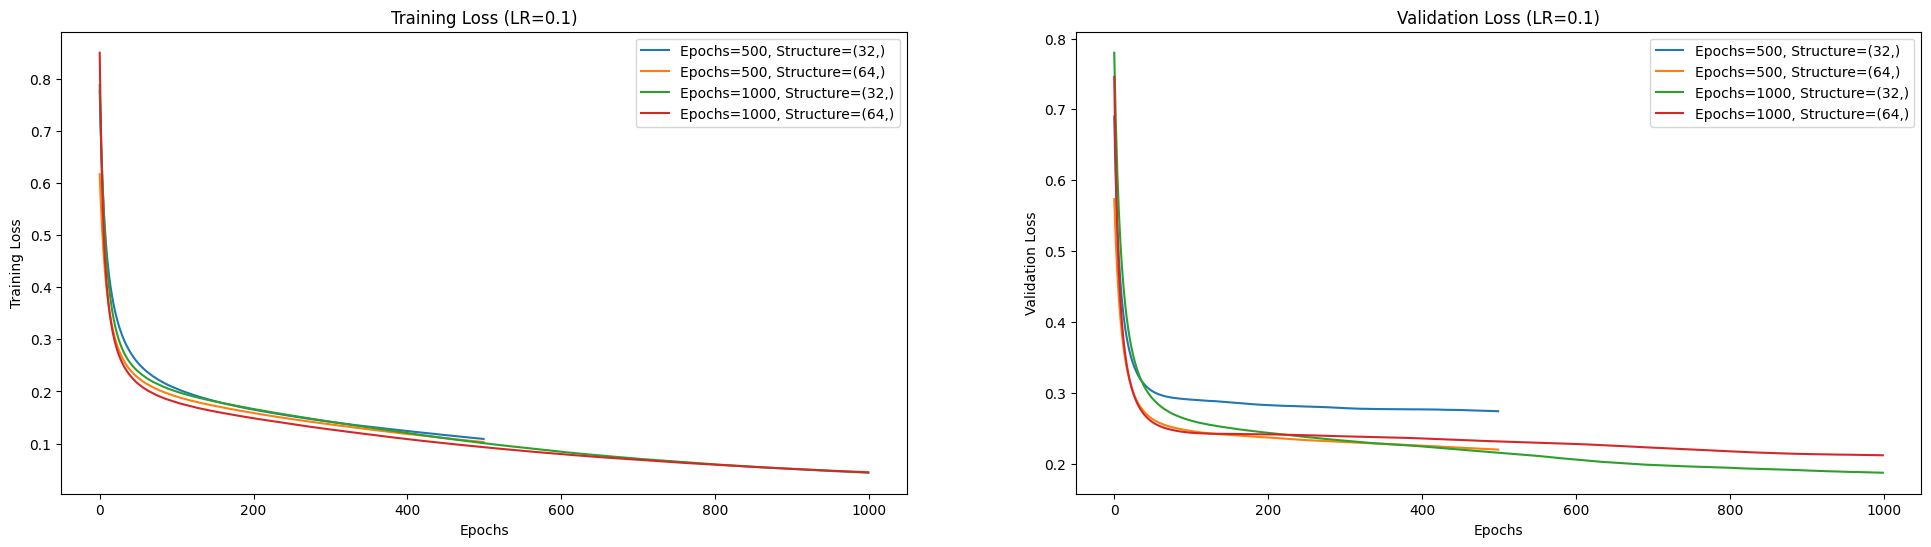

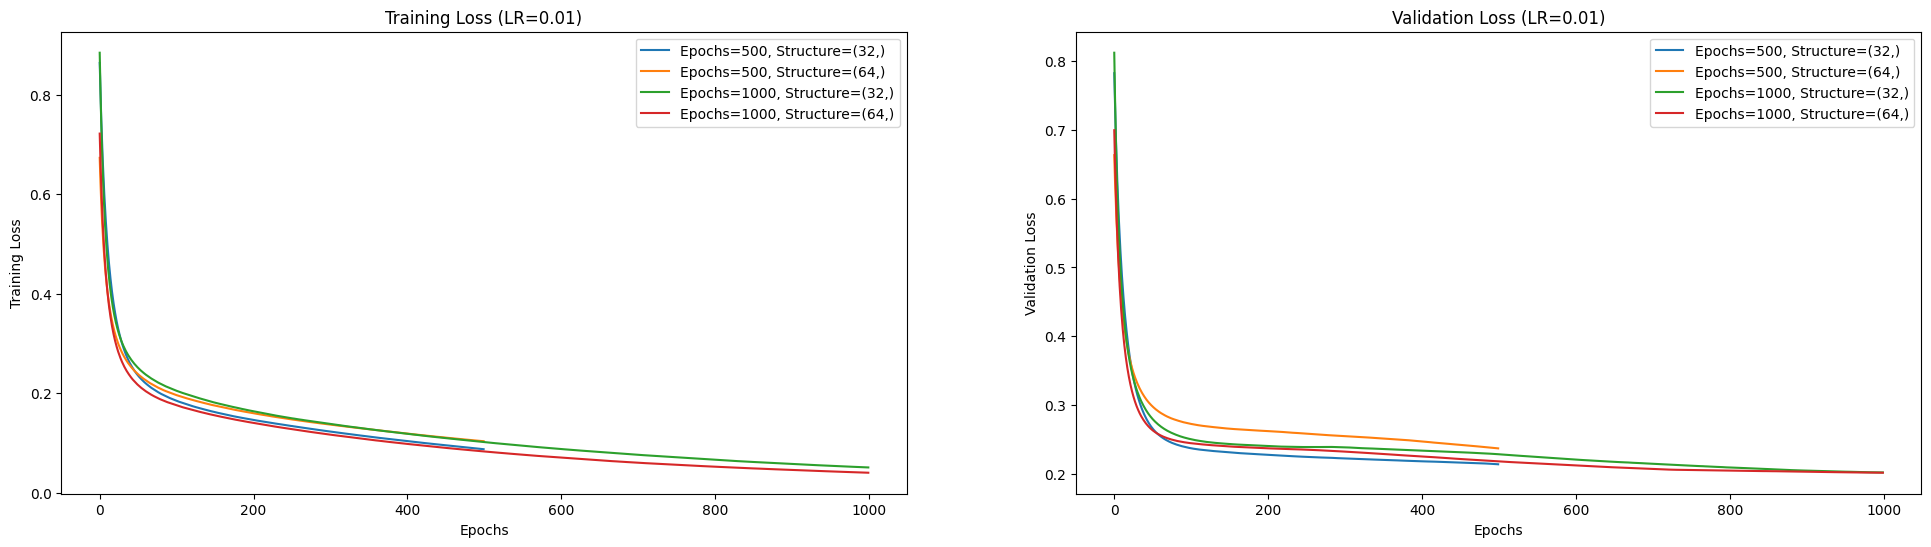

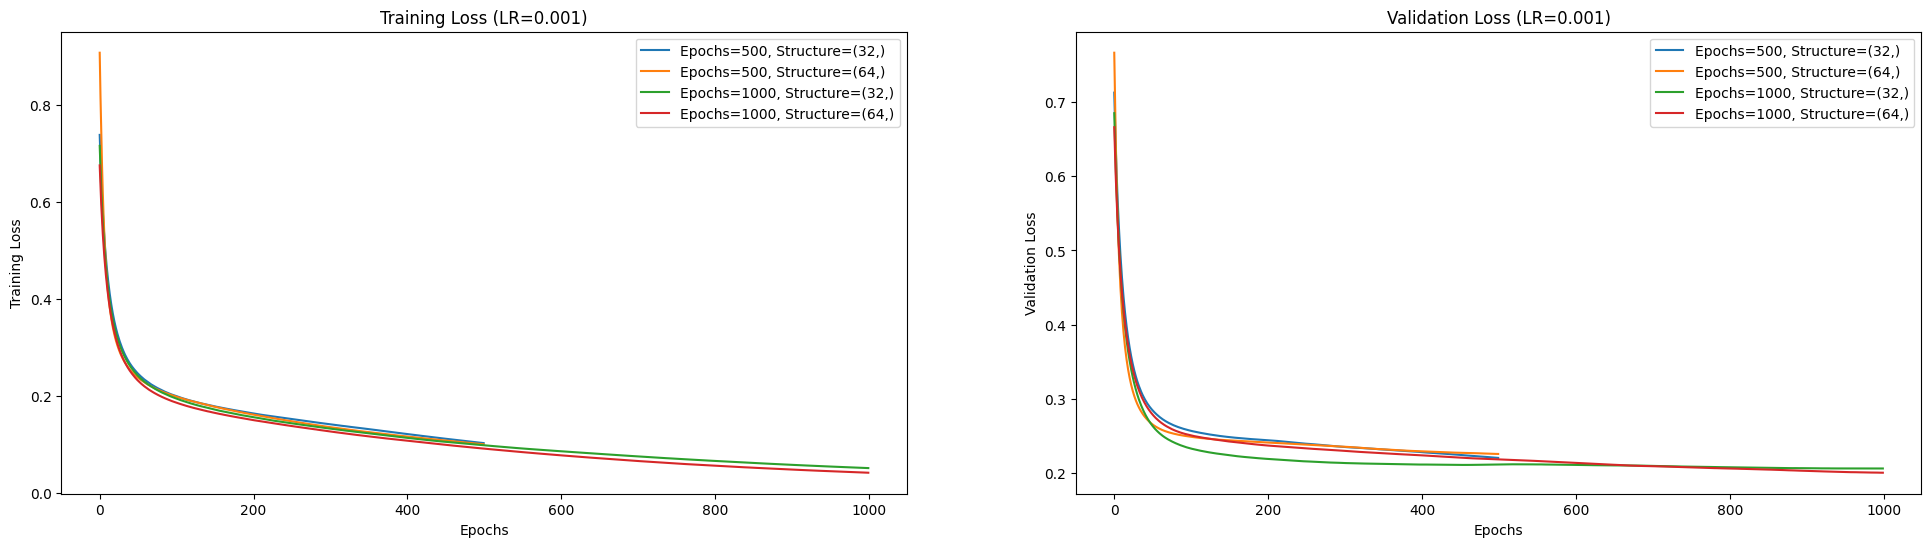

In [ ]:
def create_model(structure):
    model = Sequential()
    for units in structure:
        model.add(Dense(units, activation='relu')) # hidden layer
    model.add(Dense(1, activation='sigmoid')) # final layer
    model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the model with different learning rates, numbers of epochs, and network structures

learning_rates = [0.1, 0.01, 0.001]
num_epochs = [500, 1000]
network_structures = [(32,), (64,)]

for lr in learning_rates:
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 2, 1)
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.title(f'Training Loss (LR={lr})')

    plt.subplot(1, 2, 2)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.title(f'Validation Loss (LR={lr})')

    for epochs in num_epochs:
        for structure in network_structures:
            model = create_model(structure)
            history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)

            plt.subplot(1, 2, 1)
            plt.plot(history.history['loss'], label=f'Epochs={epochs}, Structure={structure}')

            plt.subplot(1, 2, 2)
            plt.plot(history.history['val_loss'], label=f'Epochs={epochs}, Structure={structure}')

    plt.subplot(1, 2, 1)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.legend()
    plt.show()

### ***The graphs above show the comparison of using different learning rates, epochs, and network structures. Obviously, training the model for 1000 epochs is better than training it for only 500 epochs as the validation and training loss decreases as the number of epochs increases. With learning rate of 0.1, using 32 neurons got the better result compared on using more neurons. With using 0.01 learning rate, layer with 64 neurons got the fewer validation and training loss. Meanwhile, in the lowest learning rate which is 0.001, applying 64 and 32 neurons got almost the same result, but in around 100-500 epochs, 32 neurons initially have lesser validation loss.***


### ***Creating model with the best observed combined parameters based on the graph:***

In [ ]:
model_supp = Sequential([
    Dense(32, input_shape=(16,), activation="relu"), # 1 hidden layer with 32 neurons and using relu
    Dense(1, activation="sigmoid") # Final layer using sigmoid
])

In [ ]:
# Learning rate of 0.1 and number of epochs of 1000

model_supp.compile(SGD(learning_rate = .1), "binary_crossentropy", metrics=["accuracy"])
run_hist_1_supp = model_supp.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose = 0)

In [ ]:
# Predicting X_test

y_pred_class_nn_1_supp =(model_supp.predict(X_test) > 0.5).astype("int32")
y_pred_prob_nn_1_supp = model_supp.predict(X_test)

3/3 [==============================] - 0s 4ms/step


accuracy is 0.917
roc-auc is 0.977


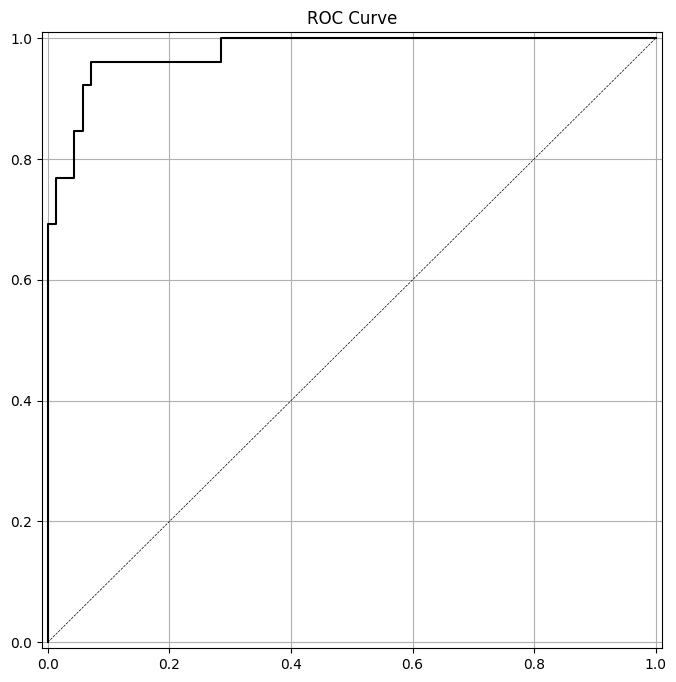

In [ ]:
# Printing and plotting the results

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1_supp)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1_supp)))

plot_roc(y_test, y_pred_prob_nn_1_supp)

### ***Based on the result of comparison of different hyperparameters, I choose on creating a model with one hidden layer and 32 neurons, learning rate of 0.1, and trained it for 1000 epochs. It leads to a better result of approximately 92% accuracy and 98% roc auc score compared to the earlier model with 86% accuracy and 94% roc auc. This proves that considering and trying out different hyperparameters would improve the accuracy and performance of the model.***

#### Conclusion

### ***To sum up, I trained neural networks using keras. I used activation function so it can be able to learn complex patterns in data: Sigmoid function for final layer and ReLU function for hidden layers. Moreover, hyperparameters like learning rate and number of epochs can also affect the result of accuracy and roc auc score. I demonstrated it by creating a models with different learning rates, epochs, and network structure. Upon observing the comparison, I chose the best hyperparameters and trained the data. It then leads to a better result than the initial model.***

google colab link: https://colab.research.google.com/drive/1yL_usqOwJnIBzJ2EP3EQLrMIaCCeoS11?usp=sharing